In [10]:
import sys
sys.path.append(r'C:\Users\TEMP.SOCL4-57\AppData\Roaming\Python\Python311\site-packages')



In [1]:
import sys
sys.executable


'C:\\Users\\irfan\\anaconda3\\python.exe'

In [2]:
!pip show pyLDAvis


Name: pyLDAvis
Version: 3.4.1
Summary: Interactive topic model visualization. Port of the R package.
Home-page: https://github.com/bmabey/pyLDAvis
Author: Ben Mabey
Author-email: ben@benmabey.com
License: BSD-3-Clause
Location: C:\Users\irfan\anaconda3\Lib\site-packages
Requires: funcy, gensim, jinja2, joblib, numexpr, numpy, pandas, scikit-learn, scipy, setuptools
Required-by: 


In [9]:

import sys
!{sys.executable} -m pip install pyLDAvis


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim

import os, re, nltk

In [5]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from pprint import pprint
import pickle 

In [6]:
df=pd.read_csv("Final_semtiment_document.csv")

In [7]:
df['Final_Tokens'] = df['Text_new'].apply(lambda x: [word for word in simple_preprocess(x, deacc=True, min_len=3, 
                                                                                  max_len=50)])

In [8]:
# create dictionary
dictionary = Dictionary(df['Final_Tokens'])
print(f'Total vocabulary size: {len(dictionary)}')

Total vocabulary size: 17399


In [9]:
corpus = [dictionary.doc2bow(doc) for doc in df['Final_Tokens']]
print(f'Total corpus size: {len(corpus)}')

Total corpus size: 38537


In [10]:
dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if dictionary[idx] in dict_corpus:
            dict_corpus[dictionary[idx]] += freq
        else: 
            dict_corpus[dictionary[idx]] = freq
df_dict = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['frequency'])

In [11]:
df_dict.sort_values('frequency', ascending = False).head(20)

,frequency
chatgpt,43961
cybersecurity,25235
security,13809
hacker,9618
use,6957
openai,4905
hack,4570
new,4272
malware,4264
data,3728


In [12]:
dictionary.filter_extremes(no_below=10, no_above=0.5) 

print(f'Total vocabulary size: {len(dictionary)}')

Total vocabulary size: 3962


In [13]:
corpus = [dictionary.doc2bow(doc) for doc in df['Final_Tokens']]

In [14]:
# Re-check the top words
dict_corpus = {}
for i in range(len(corpus)):
    for idx, freq in corpus[i]:
        if dictionary[idx] in dict_corpus:
            dict_corpus[dictionary[idx]] += freq
        else: 
            dict_corpus[dictionary[idx]] = freq
df_dict_new = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['frequency'])
df_dict_new.sort_values('frequency', ascending = False).head(20)

,frequency
security,13809
hacker,9618
use,6957
openai,4905
hack,4570
new,4272
malware,4264
data,3728
cyber,3683
infosec,3487


In [15]:
corpus_test = [dictionary.doc2bow(doc) for doc in df['Final_Tokens']]

In [16]:
len(corpus),len(dictionary)

(38537, 3962)

In [17]:
import time
import logging
from tqdm import tqdm

In [18]:
num_topics = 10
passes = 60
total_iteration = num_topics*passes

In [ ]:
start_time =time.time()


lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")

In [ ]:
pprint(lda_model.show_topics(formatted=False))

In [ ]:
# To increase the speed, use a multicore Lda model
from gensim.models.ldamulticore import LdaMulticore
start_time =time.time()
#Train the LdaMulticore model
lda_multim_model = LdaMulticore(corpus=corpus, 
                           id2word=dictionary, 
                           num_topics=num_topics, 
                           passes=passes, 
                           workers=10,eval_every=5,iterations=total_iteration)
end_time=time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")


In [48]:
pprint(lda_multim_model.show_topics(formatted=False))

[(0,
  [('python', 0.04938095),
   ('deeplearning', 0.04790521),
   ('fintech', 0.047852367),
   ('machinelearning', 0.04777104),
   ('bitcoin', 0.04612155),
   ('daysofcode', 0.045417357),
   ('insurtech', 0.043163963),
   ('nocode', 0.042180065),
   ('cybersecurite', 0.041964423),
   ('web', 0.017272446)]),
 (1,
  [('hacker', 0.038243815),
   ('security', 0.03294174),
   ('hack', 0.028824355),
   ('news', 0.018297557),
   ('data', 0.013695065),
   ('say', 0.012083349),
   ('threat', 0.01169114),
   ('check', 0.010853331),
   ('openai', 0.0088975),
   ('new', 0.008834241)]),
 (2,
  [('infosec', 0.05042775),
   ('hack', 0.029846935),
   ('ransomware', 0.02555788),
   ('cyberattack', 0.025534248),
   ('cyber', 0.022424864),
   ('data', 0.018957246),
   ('malware', 0.018285045),
   ('security', 0.018043837),
   ('infosecurity', 0.016732063),
   ('cybernews', 0.015451423)]),
 (3,
  [('security', 0.038356006),
   ('gpt', 0.013730736),
   ('threat', 0.01366474),
   ('intelligence', 0.011364

In [49]:
# Calculate the coherence score of the multicore model

cm_m = CoherenceModel(model=lda_multim_model, corpus = corpus, coherence='c_v', texts=df['Final_Tokens'])
coherence_m = cm_m.get_coherence()

print(f'Coherence score: {coherence_m}')

Coherence score: 0.36722378211963475


In [19]:
def model_coherence_generator(corpus, dictionary, data, start_topic, end_topic, step, passes, workers):
    models = []
    coherence_scores = []
    for num in tqdm(range(start_topic, end_topic+1, step)):
        ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num, passes=passes, workers=workers)
        cv_coherence_model = CoherenceModel(model=ldamodel, corpus = corpus, coherence='c_v', texts=data)
        score = cv_coherence_model.get_coherence()
        
        coherence_scores.append(score)
        models.append(ldamodel)
    return models, coherence_scores

In [20]:
#Get the coherence scores by varing the number of topics from 2 to 40 with step=2
lda_models, coherence_scores = model_coherence_generator(corpus, 
                                                         dictionary, 
                                                         df['Final_Tokens'], 
                                                         start_topic=2, 
                                                         end_topic=50, 
                                                         step=2, 
                                                         passes=10, workers=10
                                                        )

100%|██████████| 25/25 [27:27<00:00, 65.89s/it]


In [21]:
lda_models

In [22]:
coherence_scores

[0.255939464737096,
 0.36390977174652556,
 0.39191129037554157,
 0.40724588196755473,
 0.37676121287521985,
 0.4149192647941502,
 0.39193101509451816,
 0.391409538975387,
 0.4037669377869239,
 0.38885752510087374,
 0.3934556043624679,
 0.4007650192426208,
 0.4022299400344549,
 0.39023670653935955,
 0.3868264517227606,
 0.38576358896451396,
 0.4210322589391994,
 0.4285083683653404,
 0.4248481789411102,
 0.3757326991131315,
 0.4000261543019688,
 0.39261914328078534,
 0.39745638086285845,
 0.39382470969695804,
 0.36898269768472297]

In [92]:


coherence_scores[6]



0.46178019400812714

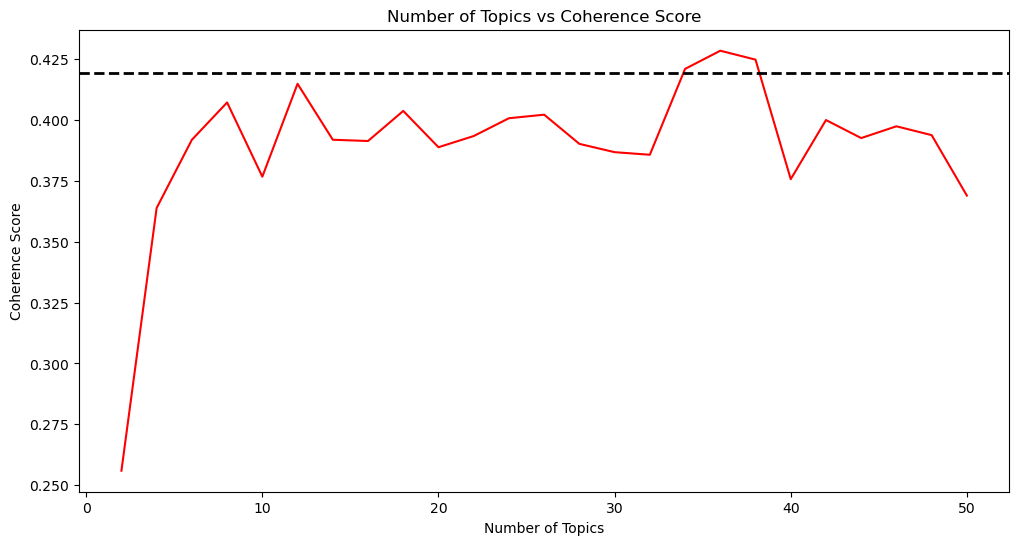

In [26]:

x_ax = range(2, 51, 2)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y=0.4194, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
plt.title('Number of Topics vs Coherence Score')
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')
plt.show()

In [27]:
coherence_scores[12],coherence_scores[24]

(0.4022299400344549, 0.36898269768472297)

In [ ]:
#save the lda_model with 10 topics
lda_10 = lda_models[12]
lda_12=lda_models[24]
# lda_10.save('lda_10')
# lda_18.save('lda_12')

In [29]:
import pickle
#save the model
pickle.dump(lda_10, open('ldamodel_t10.pkl', 'wb'))
pickle.dump(lda_12, open('ldaModel_t12.pkl', 'wb'))

In [ ]:
#Iterate LdaMulticore model over varing passes
def model_coherence_generator_2(corpus, dictionary, data, passes):
    ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10, passes=passes, workers=10, random_state=42)
    cv_coherence_model = CoherenceModel(model=ldamodel, corpus = corpus, coherence='c_v', texts=data)
    score = cv_coherence_model.get_coherence()
    return ldamodel, score

models = []
coherence_scores = []
for passes in tqdm([1, 5, 10, 20, 40, 60, 80, 100]):
    model, score = model_coherence_generator_2(corpus, dictionary, df['Final_Tokens'], passes)
    models.append(model)
    coherence_scores.append(score)

In [31]:
for m, cv in zip(models, coherence_scores):
    print("Topic Number = ",m, "has coherence value of", round(cv, 4))

Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.235
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.3715
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.4137
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.4439
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.464
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.4686
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.4618
Topic Number =  LdaMulticore<num_terms=3962, num_topics=10, decay=0.5, chunksize=2000> has coherence value of 0.462


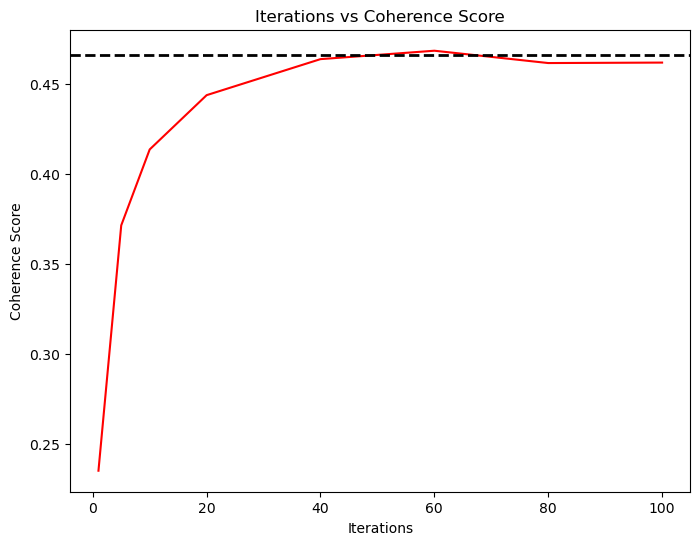

In [33]:
#Plot the iteration times vs coherence score
x_ax = [1, 5, 10, 20, 40, 60, 80, 100]
y_ax = coherence_scores
plt.figure(figsize=(8, 6))
plt.plot(x_ax, y_ax, c='r')
plt.axhline(y= 0.4663, c='k', linestyle='--', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
plt.title('Iterations vs Coherence Score')
xl = plt.xlabel('Iterations')
yl = plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_topic10_passes60 = models[5]
pickle.dump(lda_topic10_passes60, open('ldamodel_t10_p60.pkl', 'wb'))

In [94]:
#lda_10_60 = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=12, passes=60, workers=20)
cv_coherence_model = CoherenceModel(model=lda_topic10_passes60, corpus = corpus, coherence='c_v', texts=df["Final_Tokens"])
score = cv_coherence_model.get_coherence()
print(score)

0.4639609396942605


In [95]:
#get the topic distribution for each tweets
topic_dist = [lda_topic10_passes60[doc] for doc in corpus]

In [96]:
#get the dominant topic and the score
dominant_topic = [max(topic, key=lambda x:x[1])[0] for topic in topic_dist]
scores =[max(topic, key=lambda x:x[1])[1] for topic in topic_dist]

#Create a dataframe to show dominant topic for each tweet
df_topic = df[['content','Final_Tokens']].copy()
df_topic['Dominant_Topic'] = [topic+1 for topic in dominant_topic]
df_topic['Contribution%'] = [round(score*100,2) for score in scores]
df_topic.head()

,content,Final_Tokens,Dominant_Topic,Contribution%
0,Code-generating #AI can introduce #security #vulnerabilities \nhttps://t.co/tBoOQkK4LD\n\n#cryptocurrencies #MachineLearning #AI #Python #DeepLearning #100DaysOfCode #fintech #nocode #bitcoin #cybersecurity #cybersecurite #inSurTech #ChatGPT https://t.co/BOjNHVlNQ0,"[code, generate, introduce, security, vulnerability, machinelearning, python, deeplearning, daysofcode, fintech, nocode, bitcoin, cybersecurity, cybersecurite, insurtech, chatgpt]",7,72.99
1,Advanced prompt engineering also needs some kind of #security #ChatGPT @SGgrc \nhttps://t.co/euF66Y2KXt,"[advanced, prompt, engineering, also, need, kind, security, chatgpt]",2,59.52
2,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/EYOMaiWkn5.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding #Composition #Computers #CustomerService #CyberSecurity #CyberSecurityNews #Da ... https://t.co/LsbJxuSUm8,"[chatgpt, big, deal, digital, security, ainews, application, bug, chatbot, chatbots, code, cod, composition, computer, customerservice, cybersecurity]",6,65.29
3,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/1mLxQxpvAS.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding #Composition #Computers #CustomerService #CyberSecurity #CyberSecurityNews #Da ... https://t.co/vxhMiwJkPq,"[chatgpt, big, deal, digital, security, ainews, application, bug, chatbot, chatbots, code, cod, composition, computer, customerservice, cybersecurity]",6,65.29
4,I’ve been down the chat GPT rabbit hole.. and I’m fucking scared I’m not making it out of college with any job security,"[chat, gpt, rabbit, hole, fuck, scar, make, college, job, security]",2,49.56


In [97]:
# Count and percentage of tweets for each topic
df_topic_summary = df_topic.groupby('Dominant_Topic').agg({'Final_Tokens':'count'}).copy().reset_index() #replace final_tokens with tweet
df_topic_summary.rename(columns={'Final_Tokens':'Total_tweet'}, inplace=True)
df_topic_summary['Percentage%'] = round(df_topic_summary['Total_tweet']/df_topic.shape[0]*100,2)
df_topic_summary=df_topic_summary.sort_values('Total_tweet', ascending=False).reset_index(drop=True)
df_topic_summary

,Dominant_Topic,Total_tweet,Percentage%
0,6,5953,15.45
1,3,5746,14.91
2,2,4889,12.69
3,9,4331,11.24
4,5,3753,9.74
5,10,3611,9.37
6,1,2950,7.65
7,4,2935,7.62
8,7,2698,7.00
9,8,1671,4.34


In [61]:
#creat a topic dataframe
topics = [[(term, round(weight,3)) for term, 
           weight in lda_topic10_passes60.show_topic(n,topn=10)] for n in range(0,lda_topic10_passes60.num_topics)]

In [62]:
topics

[[('security', 0.057),
  ('hack', 0.054),
  ('hacker', 0.041),
  ('technology', 0.032),
  ('cloud', 0.027),
  ('cyberattack', 0.024),
  ('tech', 0.022),
  ('news', 0.022),
  ('new', 0.021),
  ('privacy', 0.019)],
 [('security', 0.037),
  ('gpt', 0.019),
  ('openai', 0.017),
  ('microsoft', 0.017),
  ('tool', 0.013),
  ('make', 0.009),
  ('work', 0.009),
  ('need', 0.009),
  ('like', 0.009),
  ('technology', 0.009)],
 [('hacker', 0.057),
  ('use', 0.047),
  ('malware', 0.042),
  ('write', 0.029),
  ('code', 0.019),
  ('create', 0.018),
  ('malicious', 0.017),
  ('phishing', 0.017),
  ('exploit', 0.012),
  ('tool', 0.01)],
 [('google', 0.037),
  ('robotics', 0.019),
  ('security', 0.015),
  ('openai', 0.014),
  ('industry', 0.014),
  ('apple', 0.014),
  ('web', 0.01),
  ('seo', 0.009),
  ('technology', 0.009),
  ('bard', 0.009)],
 [('hacker', 0.076),
  ('news', 0.037),
  ('openai', 0.025),
  ('new', 0.025),
  ('story', 0.019),
  ('security', 0.015),
  ('top', 0.013),
  ('use', 0.012),
  

In [63]:
pprint(lda_topic10_passes60.show_topics())

[(0,
  '0.057*"security" + 0.054*"hack" + 0.041*"hacker" + 0.032*"technology" + '
  '0.027*"cloud" + 0.024*"cyberattack" + 0.022*"tech" + 0.022*"news" + '
  '0.021*"new" + 0.019*"privacy"'),
 (1,
  '0.037*"security" + 0.019*"gpt" + 0.017*"openai" + 0.017*"microsoft" + '
  '0.013*"tool" + 0.009*"make" + 0.009*"work" + 0.009*"need" + 0.009*"like" + '
  '0.009*"technology"'),
 (2,
  '0.057*"hacker" + 0.047*"use" + 0.042*"malware" + 0.029*"write" + '
  '0.019*"code" + 0.018*"create" + 0.017*"malicious" + 0.017*"phishing" + '
  '0.012*"exploit" + 0.010*"tool"'),
 (3,
  '0.037*"google" + 0.019*"robotics" + 0.015*"security" + 0.014*"openai" + '
  '0.014*"industry" + 0.014*"apple" + 0.010*"web" + 0.009*"seo" + '
  '0.009*"technology" + 0.009*"bard"'),
 (4,
  '0.076*"hacker" + 0.037*"news" + 0.025*"openai" + 0.025*"new" + '
  '0.019*"story" + 0.015*"security" + 0.013*"top" + 0.012*"use" + '
  '0.011*"vulnerability" + 0.010*"bug"'),
 (5,
  '0.041*"security" + 0.023*"risk" + 0.022*"use" + 0.021*"

In [64]:
#Summarize the topic names based on each topics' top terms and highly-relevant tweets 
names = {1:"1: Cybersecurity issues with ChatGPT",
        2:"2 AI Technologies and Security",
        3:"3 Hacking Techniques and Cybersecurity Threats",
        4:"4 Technology Trends, SEO and Robotics",
        5:"5 Hacking News and Security Vulnerabilities",
        6:"6 Data Security and Risk Management",
        7:"7 Fintech and Emerging Technologies",
        8:"8 Data Science, IoT Security and Bigdata",
        9:"9 Threat Intelligence Gathering and Response",
        10:"10 Data Privacy and Information Security"
        }

In [65]:
df_topic['Topic_Name'] = df_topic['Dominant_Topic'].map(names)

In [66]:
pd.set_option('display.max_colwidth', None)
topic_df = pd.DataFrame({'Topic_Name':names.values(), 
                         'Topic_Terms':[','.join([term for term, weight in topic]) for topic in topics]},
                        index = ['Topic ' + str(n) for n in range(1,lda_topic10_passes60.num_topics+1)])
# apply style to align content to the left
topic_df

,Topic_Name,Topic_Terms
Topic 1,1: Cybersecurity issues with ChatGPT,"security,hack,hacker,technology,cloud,cyberattack,tech,news,new,privacy"
Topic 2,2 AI Technologies and Security,"security,gpt,openai,microsoft,tool,make,work,need,like,technology"
Topic 3,3 Hacking Techniques and Cybersecurity Threats,"hacker,use,malware,write,code,create,malicious,phishing,exploit,tool"
Topic 4,"4 Technology Trends, SEO and Robotics","google,robotics,security,openai,industry,apple,web,seo,technology,bard"
Topic 5,5 Hacking News and Security Vulnerabilities,"hacker,news,openai,new,story,security,top,use,vulnerability,bug"
Topic 6,6 Data Security and Risk Management,"security,risk,use,data,like,learn,business,threat,model,protect"
Topic 7,7 Fintech and Emerging Technologies,"fintech,machinelearning,bitcoin,python,deeplearning,daysofcode,insurtech,nocode,cybersecurite,web"
Topic 8,"8 Data Science, IoT Security and Bigdata","iot,bigdata,python,datascience,machinelearning,cod,linux,hack,program,javascript"
Topic 9,9 Threat Intelligence Gathering and Response,"security,threat,intelligence,artificial,cyber,read,amp,new,blog,check"
Topic 10,10 Data Privacy and Information Security,"infosec,security,data,privacy,hack,malware,cyberattack,cyber,openai,ransomware"


In [67]:
#To sort the highly relevant tweets for each topics and interprete the topic names.
df_topic[df_topic['Dominant_Topic']==2].sort_values('Contribution%', ascending=False)[0:10]

,content,Final_Tokens,Dominant_Topic,Contribution%,Topic_Name
25665,"Microsoft brings OpenAI's ChatGPT to its cybersecurity business via new Security Copilot, a tool designed to help professionals prevent and detect cyberattacks faster and with greater ease. Using both OpenAI's GPT-4 and Microsoft's own security-specific model, Security Copilot allows cybersecurity workers to catch incidents other approaches may miss, speed up their response, and improve their overall security standing. #cybersecurity #AI #ChatGPT\nhttps://t.co/6TtyWRf7A8","[microsoft, brings, openai, chatgpt, cybersecurity, business, via, new, security, copilot, tool, design, help, professional, prevent, detect, cyberattacks, faster, great, ease, use, openai, gpt, microsoft, security, specific, model, security, copilot, allow, cybersecurity, worker, catch, incident, approach, may, miss, speed, response, improve, overall, security, stand, cybersecurity, chatgpt]",2,97.80,2 AI Technologies and Security
6576,"Microsoft brings OpenAI's ChatGPT to its cybersecurity business via new Security Copilot, a tool designed to help professionals prevent and detect cyberattacks faster and with greater ease. Using both OpenAI's GPT-4 and Microsoft's own security-specific model, Security Copilot allows cybersecurity workers to catch incidents other approaches may miss, speed up their response, and improve their overall security standing. #cybersecurity #AI #ChatGPT\nhttps://t.co/6TtyWRf7A8","[microsoft, brings, openai, chatgpt, cybersecurity, business, via, new, security, copilot, tool, design, help, professional, prevent, detect, cyberattacks, faster, great, ease, use, openai, gpt, microsoft, security, specific, model, security, copilot, allow, cybersecurity, worker, catch, incident, approach, may, miss, speed, response, improve, overall, security, stand, cybersecurity, chatgpt]",2,97.80,2 AI Technologies and Security
29862,"Even though my recently invented #ChatGPT based security protocol, #CryptGPT, has a built-in Generative Adversarial Network to dynamically respond to security threats in real time, I just added Semantic and Sentiment analysis (SSAL) for one extra level of security that I feel integrates really well to the established system.\n\nThanks for the recommendation @nptacek!","[even, though, recently, invent, chatgpt, base, security, protocol, cryptgpt, build, generative, adversarial, network, dynamically, respond, security, threat, real, time, add, semantic, sentiment, analysis, ssal, one, extra, level, security, feel, integrates, really, well, establish, system, thanks, recommendation]",2,97.19,2 AI Technologies and Security
13096,"Even though my recently invented #ChatGPT based security protocol, #CryptGPT, has a built-in Generative Adversarial Network to dynamically respond to security threats in real time, I just added Semantic and Sentiment analysis (SSAL) for one extra level of security that I feel integrates really well to the established system.\n\nThanks for the recommendation @nptacek!","[even, though, recently, invent, chatgpt, base, security, protocol, cryptgpt, build, generative, adversarial, network, dynamically, respond, security, threat, real, time, add, semantic, sentiment, analysis, ssal, one, extra, level, security, feel, integrates, really, well, establish, system, thanks, recommendation]",2,97.19,2 AI Technologies and Security
37890,"Microsoft Puts ChatGPT to Work on Automating Cybersecurity. Microsoft rolled out an AI-powered security analysis tool to automate incident response and threat-hunting tasks, showcasing a security use case for the popular chatbot developed by OpenAI.\n#Microsoft #cyber #chatgpt https://t.co/IgMBb4jX8i","[microsoft, put, chatgpt, work, automate, cybersecurity, microsoft, roll, power, security, analysis, tool, automate, incident, response, threat, hunt, task, showcasing, security, use, case, popular, chatbot, develop, openai, microsoft, cyber, chatgpt]",2,96.67,2 AI Technologies and Security
5369,"➡️ It brings ton

In [46]:
df_topic.to_csv('Extracted_Twitter_topics.csv', index=False)

In [47]:
df_topic.to_csv('Extracted_Twitter_topics_2.csv', index=False)

In [68]:
#creat a topic dataframe
topics = [[(term, round(weight,3)) for term, 
           weight in lda_topic10_passes60.show_topic(n,topn=20)] for n in range(0,lda_topic10_passes60.num_topics)]

In [69]:
df_topic

,content,Final_Tokens,Dominant_Topic,Contribution%,Topic_Name
0,Code-generating #AI can introduce #security #vulnerabilities \nhttps://t.co/tBoOQkK4LD\n\n#cryptocurrencies #MachineLearning #AI #Python #DeepLearning #100DaysOfCode #fintech #nocode #bitcoin #cybersecurity #cybersecurite #inSurTech #ChatGPT https://t.co/BOjNHVlNQ0,"[code, generate, introduce, security, vulnerability, machinelearning, python, deeplearning, daysofcode, fintech, nocode, bitcoin, cybersecurity, cybersecurite, insurtech, chatgpt]",7,72.99,7 Fintech and Emerging Technologies
1,Advanced prompt engineering also needs some kind of #security #ChatGPT @SGgrc \nhttps://t.co/euF66Y2KXt,"[advanced, prompt, engineering, also, need, kind, security, chatgpt]",2,59.52,2 AI Technologies and Security
2,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/EYOMaiWkn5.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding #Composition #Computers #CustomerService #CyberSecurity #CyberSecurityNews #Da ... https://t.co/LsbJxuSUm8,"[chatgpt, big, deal, digital, security, ainews, application, bug, chatbot, chatbots, code, cod, composition, computer, customerservice, cybersecurity]",6,65.28,6 Data Security and Risk Management
3,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/1mLxQxpvAS.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding #Composition #Computers #CustomerService #CyberSecurity #CyberSecurityNews #Da ... https://t.co/vxhMiwJkPq,"[chatgpt, big, deal, digital, security, ainews, application, bug, chatbot, chatbots, code, cod, composition, computer, customerservice, cybersecurity]",6,65.29,6 Data Security and Risk Management
4,I’ve been down the chat GPT rabbit hole.. and I’m fucking scared I’m not making it out of college with any job security,"[chat, gpt, rabbit, hole, fuck, scar, make, college, job, security]",2,49.57,2 AI Technologies and Security
...,...,...,...,...,...
38532,"Creating Solidity/Rust/Clarity or any contract-based lang smart contracts from ChatGPT poses huge security risks.\n\nAs a hacker, if I can reverse engineer a model and find the sources of the training data that ChatGPT aggregates. I can inject faulty code with vulns. #NotBullish","[create, solidity, rust, clarity, contract, base, lang, smart, contract, chatgpt, pose, huge, security, risk, hacker, reverse, engineer, model, find, source, train, data, chatgpt, aggregate, inject, faulty, code, vulns, notbullish]",4,39.84,"4 Technology Trends, SEO and Robotics"
38533,We just saw someone get a #rubberduckyscript off #chatgpt &amp; use it to unlock a phone in minutes. #cybersecurity #capetown #hackers #southafrica,"[saw, someone, get, chatgpt, amp, use, unlock, phone, minute, cybersecurity, capetown, hacker, southafrica]",5,63.54,5 Hacking News and Security Vulnerabilities
38534,Where does ChatGPT fall on the political compass?\n\n#compass #does #biases #political #models #chatgpt #quiz #answers #fall #responses #results #tests #trained\n\nhttps://t.co/2I9ZXlHuP2 https://t.co/IawEECbECU,"[chatgpt, fall, political, compass, compass, bias, political, model, chatgpt, quiz, answer, fall, response, result, test, train]",6,56.71,6 Data Security and Risk Management
38535,"GitHub Trending Archive, 28 Dec 2022, Go. ZeStream/zestream-server, bitindi/blockchain-core, ChatGPT-Hackers/ChatGPT-API-server, Edgenesis/shifu, yannh/kubeconform, go-sonic/sonic, HavocFramework/Havoc, jinzhu/copier, casdoor/casdoor, hibiken/asynq https://t.co/i2wrgCrUSd","[github, trend, archive, dec, zestream, zestream, server, bitindi, blockchain, core, chatgpt, hacker, chatgpt, api, server, edgenesis, shifu, yannh, kubeconform, sonic, sonic, havocframework, havoc, jinzhu, copier, casdoor, casdoor, hibiken, asynq]",4,93.57,"4 Technology Trends, SEO and Robotics"


In [70]:

df_topic_summary = df_topic.groupby('Dominant_Topic').agg({'Final_Tokens':'count'}).copy().reset_index() #replace final_tokens with tweet
df_topic_summary.rename(columns={'Final_Tokens':'Total_tweet'}, inplace=True)
df_topic_summary['Percentage%'] = round(df_topic_summary['Total_tweet']/df_topic.shape[0]*100,2)
df_topic_summary=df_topic_summary.sort_values('Total_tweet', ascending=False).reset_index(drop=True)
df_topic_summary

,Dominant_Topic,Total_tweet,Percentage%
0,6,5949,15.44
1,3,5745,14.91
2,2,4886,12.68
3,9,4332,11.24
4,5,3754,9.74
5,10,3610,9.37
6,1,2953,7.66
7,4,2938,7.62
8,7,2698,7.00
9,8,1672,4.34


In [71]:
df_temp = df_topic_summary.sort_values('Dominant_Topic')
topic_df['Tweet_count'] = df_temp['Total_tweet'].values
topic_df



,Topic_Name,Topic_Terms,Tweet_count
Topic 1,1: Cybersecurity issues with ChatGPT,"security,hack,hacker,technology,cloud,cyberattack,tech,news,new,privacy",2953
Topic 2,2 AI Technologies and Security,"security,gpt,openai,microsoft,tool,make,work,need,like,technology",4886
Topic 3,3 Hacking Techniques and Cybersecurity Threats,"hacker,use,malware,write,code,create,malicious,phishing,exploit,tool",5745
Topic 4,"4 Technology Trends, SEO and Robotics","google,robotics,security,openai,industry,apple,web,seo,technology,bard",2938
Topic 5,5 Hacking News and Security Vulnerabilities,"hacker,news,openai,new,story,security,top,use,vulnerability,bug",3754
Topic 6,6 Data Security and Risk Management,"security,risk,use,data,like,learn,business,threat,model,protect",5949
Topic 7,7 Fintech and Emerging Technologies,"fintech,machinelearning,bitcoin,python,deeplearning,daysofcode,insurtech,nocode,cybersecurite,web",2698
Topic 8,"8 Data Science, IoT Security and Bigdata","iot,bigdata,python,datascience,machinelearning,cod,linux,hack,program,javascript",1672
Topic 9,9 Threat Intelligence Gathering and Response,"security,threat,intelligence,artificial,cyber,read,amp,new,blog,check",4332
Topic 10,10 Data Privacy and Information Security,"infosec,security,data,privacy,hack,malware,cyberattack,cyber,openai,ransomware",3610


In [72]:
import seaborn as sns

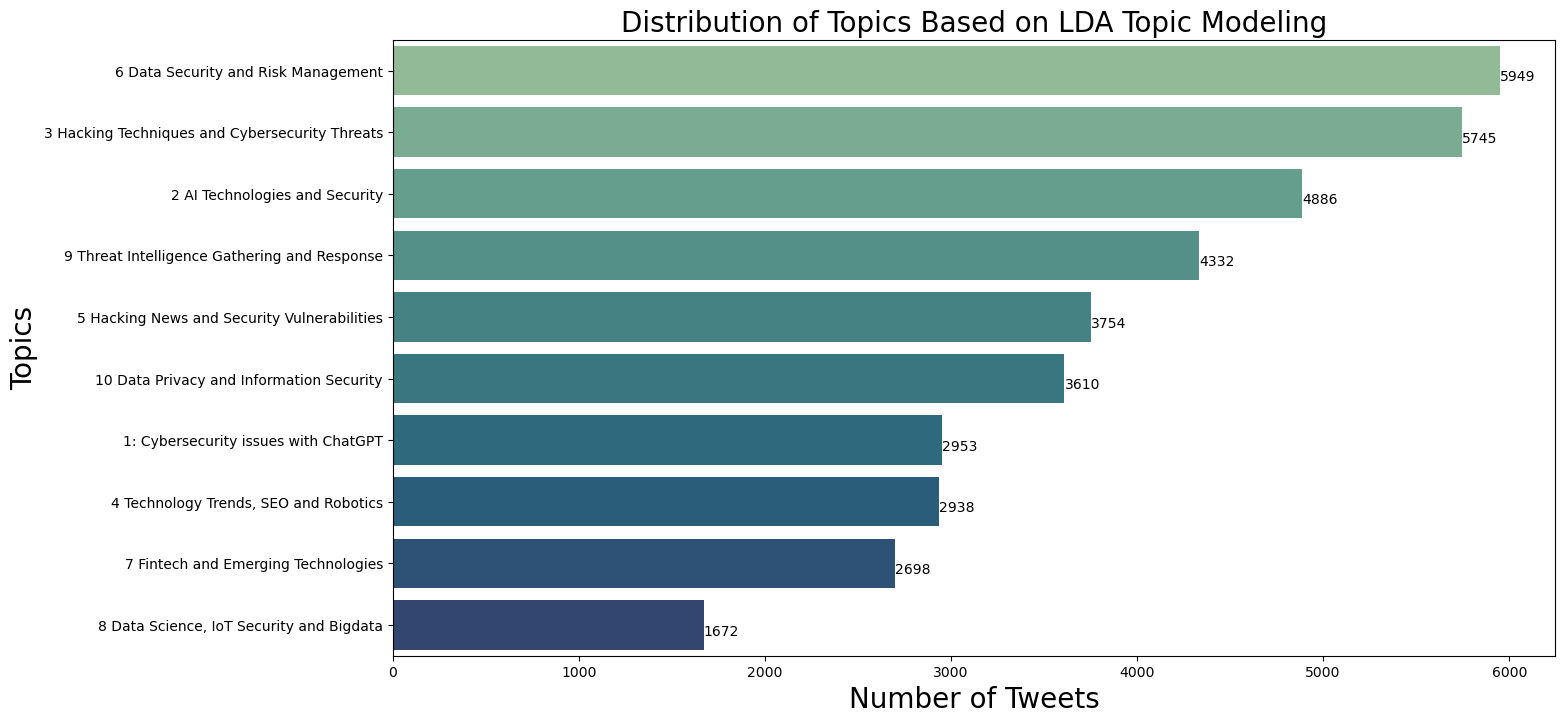

In [73]:
#plot a bar chart to show the number of tweets for each topic
sort_name = topic_df.sort_values('Tweet_count',ascending=False)['Topic_Name'].to_list()
fig,ax = plt.subplots(1,1,figsize=(15,8))
ax = sns.barplot(y=topic_df['Topic_Name'], x=topic_df['Tweet_count'], order=sort_name, palette='crest')
for i in ax.patches:
    ax.annotate(int(i.get_width()), (i.get_width(), i.get_y()+0.5), va='center')
ax.set_ylabel('Topics', size=20)
ax.set_xlabel('Number of Tweets', size=20)
ax.set_title('Distribution of Topics Based on LDA Topic Modeling', size=20)

plt.show()